Bu çalışmamda veri setini yıl, ülke ve deneyim seviyesine göre inceledim.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv(r"C:\Users\muhta\Downloads\ds_salaries.csv")

In [77]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [79]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Göründüğü üzere veri setinde null değer bulunumuyor.

In [80]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Kullanmayacağım sütunları çıkarıyorum.

In [81]:
df=df.drop(["Unnamed: 0","employment_type","job_title","salary","salary_currency","remote_ratio","company_location","company_size"], axis=1)

In [82]:
df.head()

,work_year,experience_level,salary_in_usd,employee_residence
0,2020,MI,79833,DE
1,2020,SE,260000,JP
2,2020,SE,109024,GB
3,2020,MI,20000,HN
4,2020,SE,150000,US


### experience_level dağılımı

In [83]:
import plotly.express as px

In [84]:
values1 = df["experience_level"]
names1 = ["SE","MI","EN","EX"]

In [85]:
fig = px.pie(df, values = values1.value_counts(), names = names1, title = 'Experience Level Dağılımı')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(title_font_size = 24)
fig

Grafiğe baktığımızda şirketlerde çalışanların %81.2 gibi büyük bir kısmı Senyör ve Mid seviyelerinde görülmekte.

In [86]:
px.histogram(df,
             x='salary_in_usd',
             marginal='rug',
             template='seaborn',
             labels={'salary_in_usd':'Salary in USD'},
             title='<b> Maaş Dağılımı')

### Experience level' a göre maaş ortalamaları

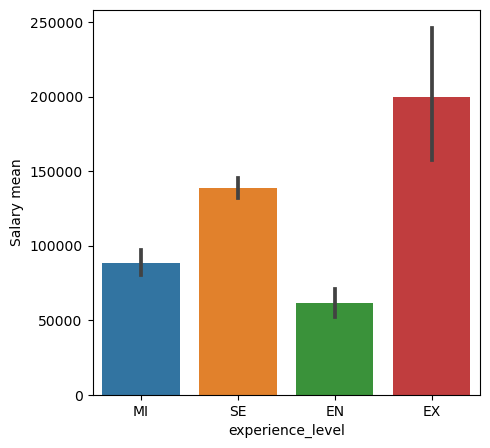

In [87]:
salary_mean = df.groupby(["experience_level"])["salary_in_usd"].agg(["mean"])
experience_level=salary_mean.index.get_level_values("experience_level")
plt.figure(figsize=(5,5))
sns.barplot(x="experience_level", y='salary_in_usd', data=df)
plt.ylabel("Salary mean")
plt.show()

Beklediğimiz üzere Entry-level(EN) ile Expert Executive-level(EX) arasında 4 kat gibi büyük bir fark var. Mid-Level(MI) ve Entry_level(EN) ise birbirlerine ortalama olarak daha yakınlar.

### Experience Level'a göre yıl bazında ortalama maaşlar

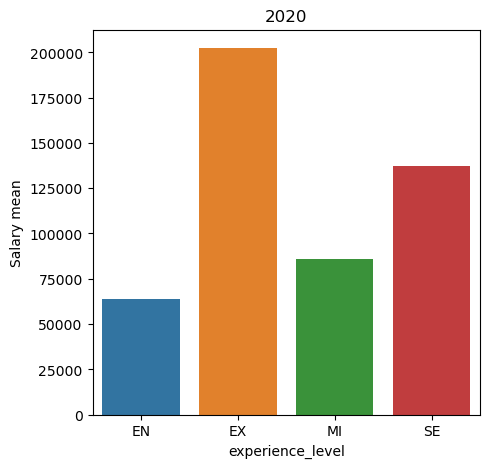

In [88]:
work_year_salary_mean = df.groupby(["work_year","experience_level"]).agg({"salary_in_usd":"mean"})
df_2020 = work_year_salary_mean.iloc[:4]
plt.figure(figsize=(5,5))
sns.barplot(x=df_2020.index.get_level_values("experience_level"),y=("salary_in_usd"),data=df_2020)
plt.title("2020")
plt.ylabel("Salary mean")
plt.show()

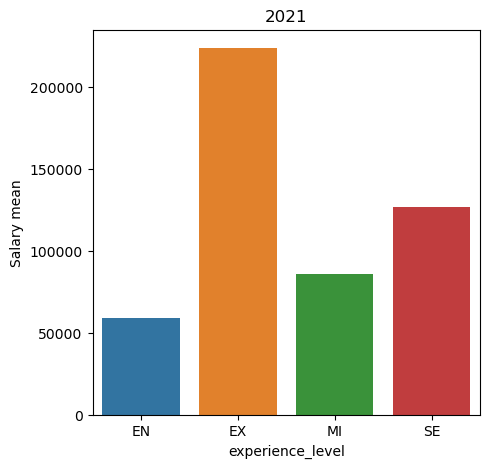

In [89]:
df_2021 = work_year_salary_mean.iloc[4:8]
plt.figure(figsize=(5,5))
sns.barplot(x=df_2021.index.get_level_values("experience_level"),y=("salary_in_usd"),data=df_2021)
plt.title("2021")
plt.ylabel("Salary mean")
plt.show()

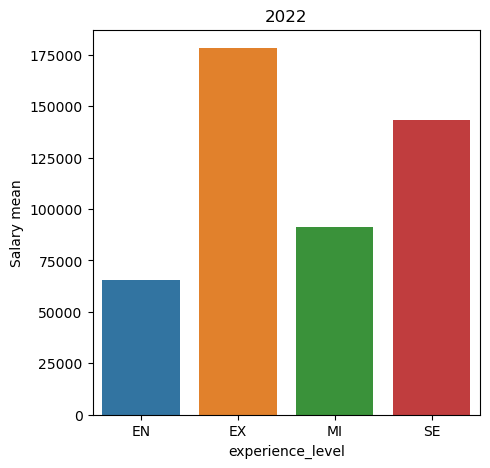

In [90]:
df_2022 = work_year_salary_mean.iloc[8:12]
plt.figure(figsize=(5,5))
sns.barplot(x=df_2022.index.get_level_values("experience_level"),y=("salary_in_usd"),data=df_2022)
plt.title("2022")
plt.ylabel("Salary mean")
plt.show()

In [91]:
ortalama_maaslar = df.groupby(["work_year","experience_level"])["salary_in_usd"].mean().unstack()

In [92]:
df

,work_year,experience_level,salary_in_usd,employee_residence
0,2020,MI,79833,DE
1,2020,SE,260000,JP
2,2020,SE,109024,GB
3,2020,MI,20000,HN
4,2020,SE,150000,US
...,...,...,...,...
602,2022,SE,154000,US
603,2022,SE,126000,US
604,2022,SE,129000,US
605,2022,SE,150000,US


<Figure size 1000x600 with 0 Axes>

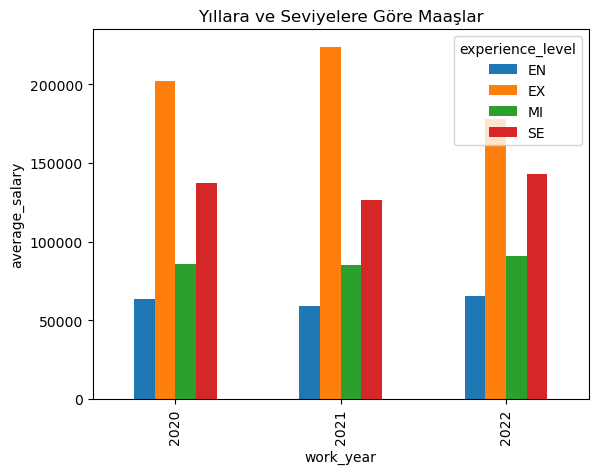

In [93]:
plt.figure(figsize=(10,6))

ortalama_maaslar.plot(kind="bar")

plt.xlabel("work_year")
plt.ylabel("average_salary")
plt.title("Yıllara ve Seviyelere Göre Maaşlar")
plt.show()

Bu verilere baktığımızda genel olarak bir sıkıntı gözükmüyor olabilir ama 2020 ve 2021 yılları arasında Senyör ve Entry level maaş ortalamalarında bir düşüş görülmekte. Diğer seviyelerde maaşların ortalaması artarken bu iki seviyede bir düşüş meydana gelmiş. Bunun iki sebebi olabilir. Birincisi veri setinin hatalı olması ikincisi ise işe yeni giren çalışanların sayısının artmış olması. Şimdi bunun sebebini öğrenmeye çalışacağım.

In [94]:
employee_counts = df["work_year"].value_counts()

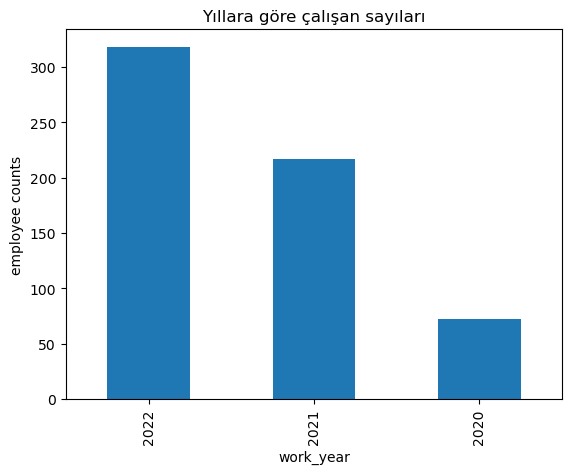

In [95]:
employee_counts.plot(kind="bar")
plt.xlabel("work_year")
plt.ylabel("employee counts")
plt.title("Yıllara göre çalışan sayıları")
plt.show()

Beklediğimiz gibi çalışan sayılarında 2020 ve 2021 arasında yaklaşık 4 kat artış görülmüş. Bu maaş ortalamlarının düşmesinin sebebi olabilir.

In [96]:
average_salary_by_year = df.groupby(["work_year"])["salary_in_usd"].mean()

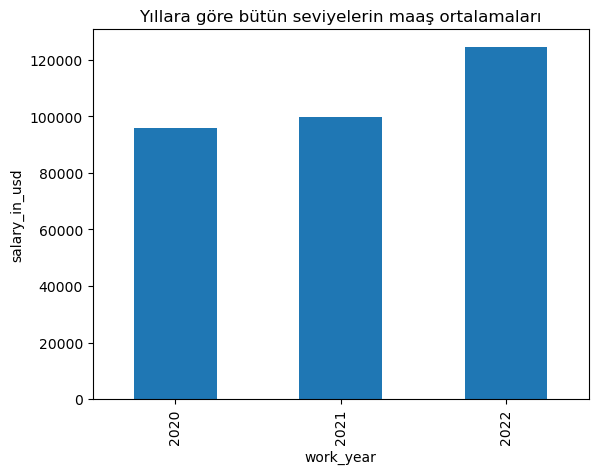

In [97]:
average_salary_by_year.plot(kind="bar")
plt.xlabel("work_year")
plt.ylabel("salary_in_usd")
plt.title("Yıllara göre bütün seviyelerin maaş ortalamaları")
plt.show()

Bu grafiğe baktığımızda Entry ve Senyör seviyelerinde ortalama olarak maaşlarda düşüş olmasına rağmen total veride yükseliş görülmüş. Buna neden olan durumun çalışan kişi sayısının büyük artışından dolayı rekabet ortamının maaş ortalamalarına etki ettiğini düşünüyorum.

### Ülkelerin Maaş Ortalamaları

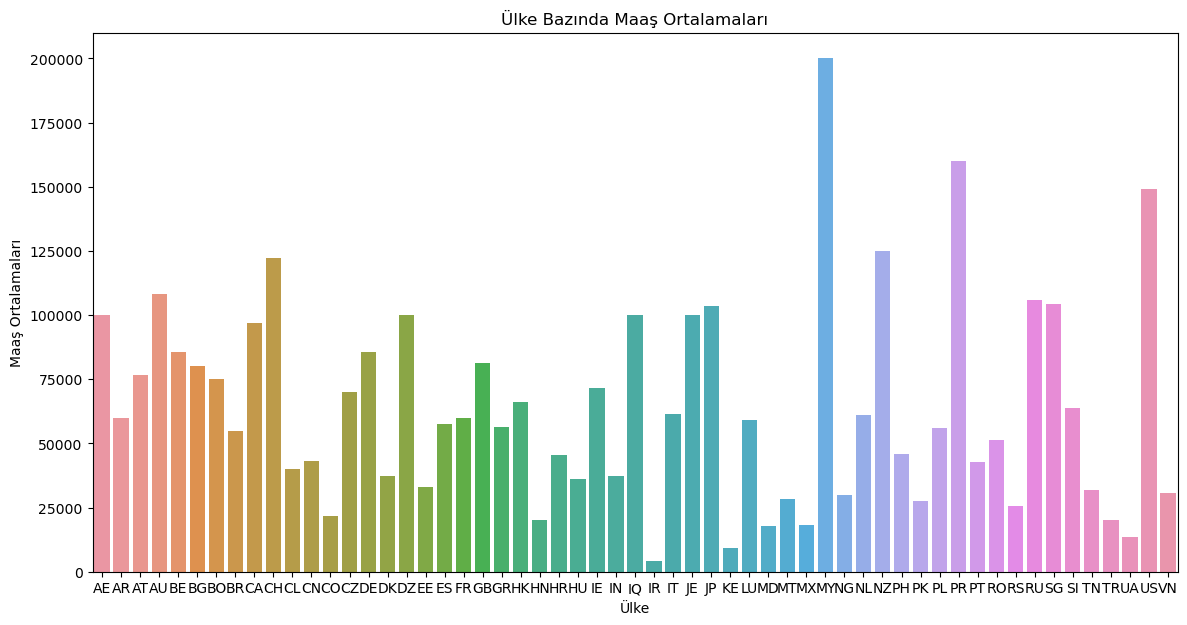

In [98]:
country_salary_ortalama = df.groupby(["employee_residence"])["salary_in_usd"].mean()

plt.figure(figsize=(14, 7))
sns.barplot(x=country_salary_ortalama.index, y=country_salary_ortalama.values)
plt.xlabel("Ülke")
plt.ylabel("Maaş Ortalamaları")
plt.title("Ülke Bazında Maaş Ortalamaları")
plt.show()

Göründüğü üzere maaş ortalaması en yüksek ülke Malezya ancak bunun sebebi şirket sayısının çok az olması olabilir. Bunu öğrenebilmek için ülkelerin toplam maaş durumlarına bakacağım.

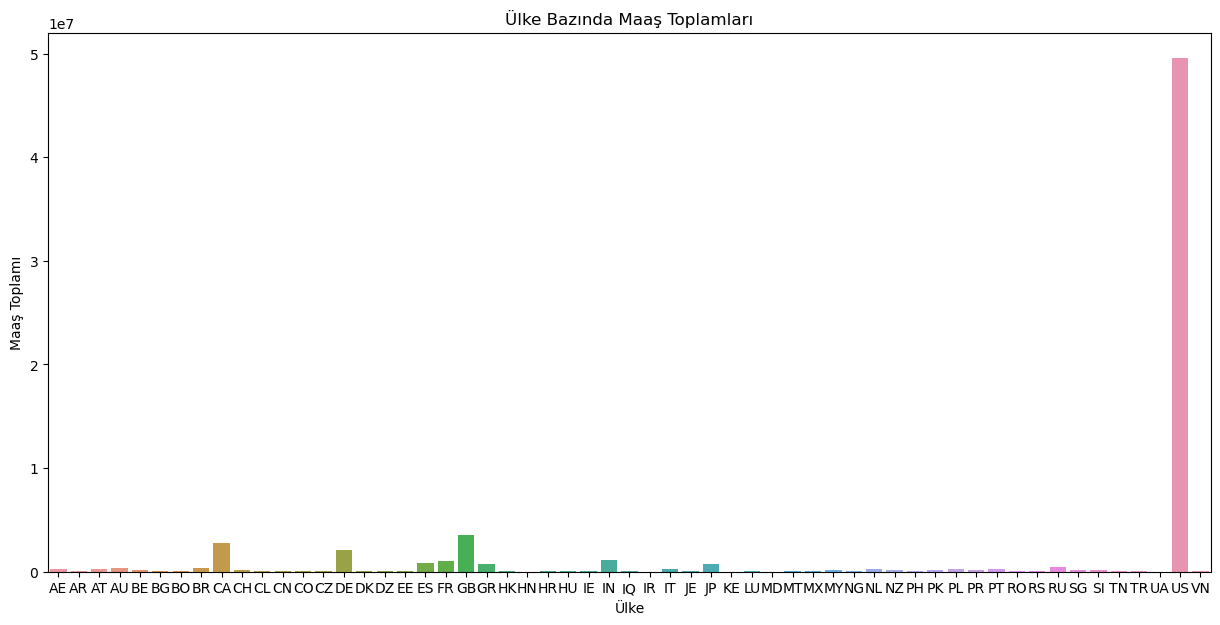

In [99]:
country_salary_total = df.groupby(["employee_residence"])["salary_in_usd"].sum()
country_salary_total
plt.figure(figsize=(15, 7))
sns.barplot(x=country_salary_total.index, y=country_salary_total)
plt.xlabel("Ülke")
plt.ylabel("Maaş Toplamı")
plt.title("Ülke Bazında Maaş Toplamları")
plt.show()

Evet tam da düşünüğüm gibi Malezya'nın maaş ortalamasının çok yüksek olmasının sebebi şirket sayısının çok az olması ya da çalışan sayısının çok az olması.


In [100]:
employee_residence_count=df["employee_residence"].value_counts().head(20)
df_erc=employee_residence_count.to_frame().reset_index()
df_erc.rename(columns={'employee_residence': 'employee_residence_count'}, inplace=True)
df_erc.rename(columns={'index': 'employee_residence'}, inplace=True)
fig = px.pie(values=df_erc["employee_residence_count"], names=df_erc["employee_residence"])
fig.show()

Görmüş olduğunuz pay grafiğinde çalışan sayısı en yüksek 20 ülkeyi göstermek istedim. 20 ülkeyi göstermemin sebebi çok fazla 1 ve 2 değere sahip ülke olduğundan grafiğin sağlıksız çalışmasıydı. Görüldüğü üzere çalışan sayısı en yüksek 20 ülkeyi almama rağmen US(Amerika) kodlu ülkenin ilk 20 ülkeye karşı kurmuş olduğu büyük bir üstünlük var. Buradan dünyadaki çalışanların %60'ı ABD'de çalışıyor sonucunu çıkarabiliriz. En azından kullandığımız veri setine göre...

<Figure size 1000x600 with 0 Axes>

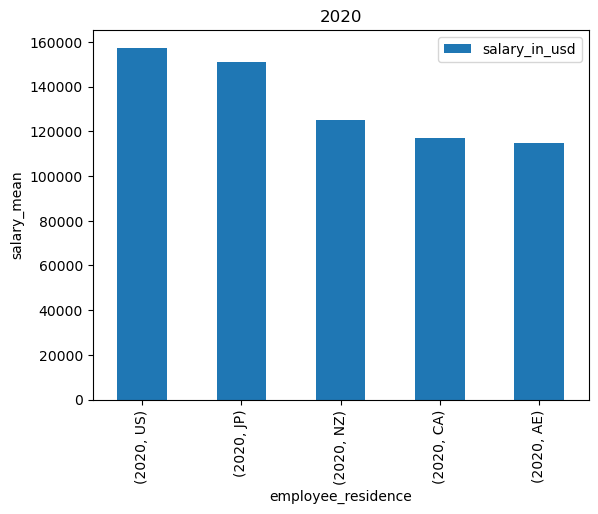

In [101]:
five_country_salary_mean = df.groupby(["work_year","employee_residence"])["salary_in_usd"].mean().groupby("work_year").nlargest(5).reset_index(level=0,drop=True)
five_country_salary_mean = np.array_split(five_country_salary_mean,3)
workYear2020=five_country_salary_mean[0]
workYear2020=workYear2020.to_frame()
workYear2020
plt.figure(figsize=(10,6))

workYear2020.plot(kind="bar")

plt.xlabel("employee_residence")
plt.ylabel("salary_mean")
plt.title("2020")
plt.show()

<Figure size 1000x600 with 0 Axes>

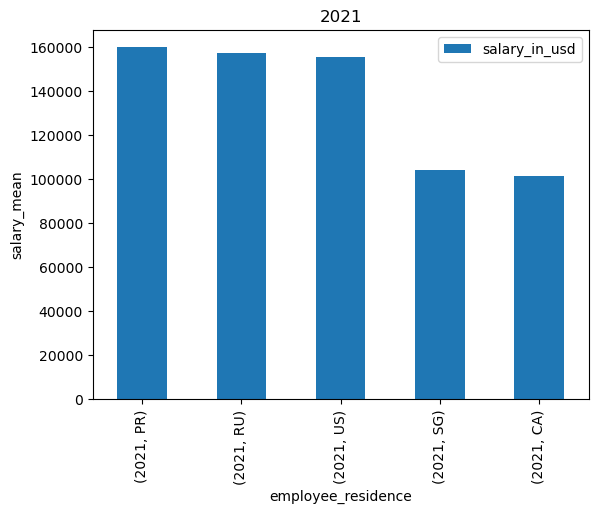

In [102]:
workYear2021=five_country_salary_mean[1]
workYear2021=workYear2021.to_frame()
workYear2021
plt.figure(figsize=(10,6))

workYear2021.plot(kind="bar")

plt.xlabel("employee_residence")
plt.ylabel("salary_mean")
plt.title("2021")
plt.show()

<Figure size 1000x600 with 0 Axes>

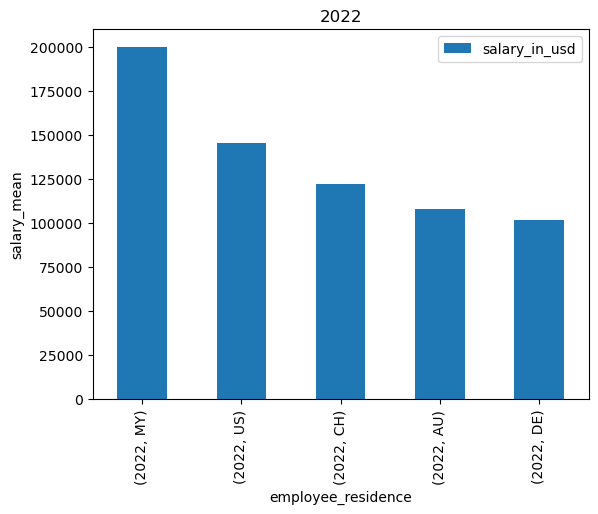

In [103]:
workYear2022=five_country_salary_mean[2]
workYear2022=workYear2022.to_frame()
workYear2022

plt.figure(figsize=(10,6))

workYear2022.plot(kind="bar")

plt.xlabel("employee_residence")
plt.ylabel("salary_mean")
plt.title("2022")
plt.show()

2020 yılından 2022 yılına doğru geldiğimizde Amerika'nın maaş ortalamalarında düşüşü görmekteyiz. Aynı zamanda 2020 ve 2021 senesinde Malezya yokken 2022 yılında en üst seviyeye yerleşmesinin sebebi veri setimizdeki verilerin yetersiz olmasından kaynaklanmaktadır. Amerika'nın düşüş sebebi ise çalışan sayısının artışından kaynaklanmaktadır.

-------------------------------------------------------------------------------------------------------------

Bu bölümde yukarıda analizini yaptığım veri setinin yıl, tecrübe ve ikamet edilen yer parametrelerini kullanarak 5 farklı regresyon türüyle(Decision Tree, Random Forest, Lasso, Elasstic ve Ridge) maaş tahmini yapmaya çalışacağım. Kullandığım tahmin modellerinin başarı oranını ölçmek için MAE, MSE, RMSE ve R2 gibi metriklerle aralarında kıyas yapacağım.

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [137]:
data_set = pd.read_csv(r"C:\Users\muhta\Downloads\ds_salaries.csv")

Öncelikle data setimizdeki kategorik verileri sayısal verilere dönüştürmek için OneHotEncoder kullanıyorum.

In [138]:
data_set.drop(["Unnamed: 0","employment_type","job_title","salary","salary_currency","remote_ratio","company_location","company_size"], axis=1, inplace=True)
data_set

,work_year,experience_level,salary_in_usd,employee_residence
0,2020,MI,79833,DE
1,2020,SE,260000,JP
2,2020,SE,109024,GB
3,2020,MI,20000,HN
4,2020,SE,150000,US
...,...,...,...,...
602,2022,SE,154000,US
603,2022,SE,126000,US
604,2022,SE,129000,US
605,2022,SE,150000,US


In [107]:
experience_level_types = pd.get_dummies(data_set.experience_level, prefix = "experience_level")
employee_residence_types = pd.get_dummies(data_set.employee_residence, prefix = "employee_residence")

data_set = pd.concat([data_set, experience_level_types,employee_residence_types],axis =1)

In [108]:
data_set

,work_year,experience_level,salary_in_usd,employee_residence,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employee_residence_AE,employee_residence_AR,...,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN
0,2020,MI,79833,DE,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,SE,260000,JP,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,SE,109024,GB,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,MI,20000,HN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,SE,150000,US,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,154000,US,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,SE,126000,US,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,SE,129000,US,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,SE,150000,US,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
data_set.drop(["experience_level", "employee_residence"],axis=1,inplace=True)

In [110]:
data_set

,work_year,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employee_residence_AE,employee_residence_AR,employee_residence_AT,employee_residence_AU,...,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN
0,2020,79833,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,109024,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,20000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,150000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,126000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,129000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,150000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Veri setinin makine öğrenmesine uygun olabilmesi için sayısal olmayan bütün column'ları sildim ve artık hazırız

In [111]:
y = data_set["salary_in_usd"]

In [112]:
data_set.drop(["salary_in_usd"],axis = 1, inplace = True)

In [113]:
x = data_set

Veri setimizi y bağımlı, x bağımsız değişken olarak ikiye ayırdım. 

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state =46)

Burda verilerimin 0.25'lik kısmını yani dörtte birini train için ayırdım. Verilerimizin birbirini yutmaması için normalizasyon işlemi yapalım.

In [115]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Decision Tree Regression

In [116]:
tree_regression = DecisionTreeRegressor(random_state = 42, max_depth = 2)
tree_regression = tree_regression.fit(x_train, y_train)
tahmin_tree_regression = tree_regression.predict(x_test)

#### Random Forest Regression

In [117]:
random_regression = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 42)
random_regression.fit(x_train, y_train)
tahmin_random_regression = random_regression.predict(x_test)

#### Lasso Regression

In [120]:
lassoReg = Lasso(alpha = 42)
lassoReg.fit(x_train, y_train)
tahmin_lasso = lassoReg.predict(x_test)

#### Elastic Regression

In [121]:
elastic_reg = ElasticNet(random_state = 0)
elastic_reg.fit(x_train, y_train)
tahmin_elastic = elastic_reg.predict(x_test)

#### Ridge Regression

In [122]:
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)
tahmin_ridge = ridge_reg.predict(x_test)

In [129]:
predicts = [tahmin_tree_regression,tahmin_random_regression,tahmin_lasso,tahmin_elastic,tahmin_ridge]
algoritma_names = ["Karar Ağacı Regresyon", "Random Forest Regresyon", "Lasso Regresyon", "Elastic Regresyon", "Ridge Regresyon"]

#### Sonuçları hesaplama fonksiyonu

In [130]:
def performance_calculate(predict):
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse) # yada mse**(0.5)
    r2 = r2_score(y_test, predict)
    
    data = [mae, mse, rmse, r2]
    return data

In [131]:
seriler = []
metrics = ["Mean Abssolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)","R2"]


In [132]:
for i in predicts:
    data = performance_calculate(i)
    seriler.append(data)

In [133]:
dfPred=pd.DataFrame(data = seriler, index = algoritma_names,columns=metrics)
pd.set_option("display.colheader_justify","center") #kolon isimlerini ortalama

In [134]:
dfPred

,Mean Abssolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R2
Karar Ağacı Regresyon,39315.874149,3.358632e+09,57953.709926,0.349934
Random Forest Regresyon,34809.707920,2.229641e+09,47219.078885,0.568451
Lasso Regresyon,33759.500803,2.535902e+09,50357.743665,0.509174
Elastic Regresyon,35230.813889,2.815098e+09,53057.493091,0.455135
Ridge Regresyon,34431.819458,2.570328e+09,50698.400238,0.502511


5 farklı algoritma için sonuçlarımız tabloda gözükmekte. Biliyoruz ki R2 değeri 0 ile 1 arasında değer vermekte ve değer 1'e ne kadar yakın olursa tahminimiz o kadar iyi çıkacaktır. Bu 5 algoritmada en iyi sonuç veren Random Forest Regression algoritması ancak R2 yaklaşık 0.57 değerinde ve bu değer tahmin yapmamız için hiç iyi bir değer değil. Bunun sebebi veri setimizin min ve max değerlerinin arasında çok uçuk farklar olması(Malezyanın çalışan sayısının çok az olmasından dolayı maaş ortalamasının en yüksek olması gibi). Decision Tree Regression algoritması tek ağaç ile çalıştığı için böyle karmaşık durumlarda bize doğru sonuçlar vermeyebilir tabloda görüldüğü gibi. Bu sonuçları iyileştirmek için max_depth, random_state, alpha değerleriyle oynayabiliriz. 

Bu projede gözetimli makine öğrenmesi ile maaş tahmini yapmaya çalıştım. Yıl, tecrübe ve ülke bağımsız değerlerinden maaş bağımlı değerini bulmaya çalıştık. Veri setini one hot encoder kullanarak sınıflandırdım. Sınıflandırmasını yaptığım verileri 5 tahmin algoritması ile test ettim. Tahmin sonuçlarını 4 farklı hata metriği ile karşılaştırdım(MAE, MSE, RMSE, R2).